Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

In this dataset, the same participants answered questions in 2012 and again 2014.

### Data Cleaning

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import math

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df0 = pd.read_csv('../data/ESSdata_Thinkful.txt', delimiter=',')
df0 = df0.dropna()
df0.dataframeName = 'ESS_Data'
df0.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
# Relabel year
df = pd.DataFrame()
df['Year'] = df0['year'].astype('int')
df.loc[df['Year'] == 6,'Year'] = 2012
df.loc[df['Year'] == 7,'Year'] = 2014

In [4]:
# Relabel gender
df['Gender'] = df0['gndr'].astype('int')
df.loc[df['Gender'] == 1,'Gender'] = 'M'
df.loc[df['Gender'] == 2,'Gender'] = 'F'

In [5]:
# Rename variables
df['Country'] = df0['cntry']
df['ID'] = df0['idno'].astype('int')
df['TV_Hrs'] = df0['tvtot'].astype('int')
df['Trust'] = df0['ppltrst'].astype('int')
df['Fairness'] = df0['pplfair'].astype('int')
df['Helfulness'] = df0['pplhlp'].astype('int')
df['Happiness'] = df0['happy'].astype('int')
df['Social_Activity'] = df0['sclmeet'].astype('int')
df['Age'] = df0['agea'].astype('int')

In [6]:
# Relabel partner so that 0 = does not live w/ partner
df['Partner'] = df0['partner'].astype('int')%2

In [7]:
df.head()

,Year,Gender,Country,ID,TV_Hrs,Trust,Fairness,Helfulness,Happiness,Social_Activity,Age,Partner
0,2012,F,CH,5,3,3,10,5,8,5,60,1
1,2012,F,CH,25,6,5,7,5,9,3,59,1
2,2012,M,CH,26,1,8,8,8,7,6,24,0
3,2012,F,CH,28,4,6,6,7,10,6,64,1
4,2012,F,CH,29,5,6,7,5,8,7,55,1


### 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [8]:
df.groupby(['Country','Year'])['Trust'].mean()

Country  Year
CH       2012    5.685792
         2014    5.764468
CZ       2012    4.402662
         2014    4.356436
DE       2012    5.076923
         2014    5.357143
ES       2012    5.127807
         2014    4.940035
NO       2012    6.648305
         2014    6.599719
SE       2012    6.043073
         2014    6.239908
Name: Trust, dtype: float64

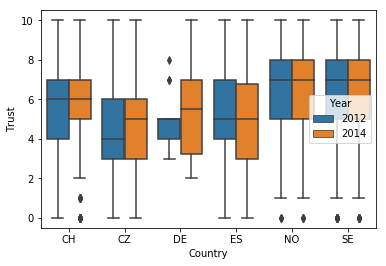

In [9]:
sns.boxplot(x='Country', y='Trust', hue='Year', data=df)

From the box plots, it appears that there was a change in median trust level in the Czech Republic and Denmark while trust level in other countries appears fairly stable.

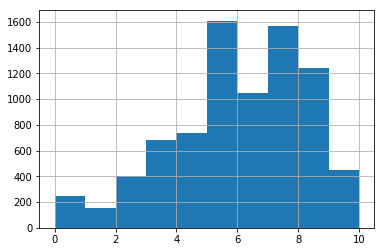

In [10]:
df['Trust'].hist()

The distribution of trust level is a little skewed but not too far from normal. Since two years will be compared for each country and the same participants were surveyed, a paired t-test can be applied to each.

#### Switzerland

In [11]:
df1 = df[df['Country']=='CH']

# Ensure that all IDs are in both 2012 and 2014 responses so that paired t-test is valid
df2 = df1[df1['Year']==2012].set_index('ID').join(
    df1[df1['Year']==2014].set_index('ID'),on='ID',
                                  how='inner',lsuffix='_2012',rsuffix='_2014')

# Run paired t-test
stats.ttest_rel(df2['Trust_2012'], df2['Trust_2014'])

Ttest_relResult(statistic=-0.28086950742787586, pvalue=0.7788927785846359)

There does not appear to be a significant difference in trust level for Switzerland.

#### Czech Republic

In [12]:
df1 = df[df['Country']=='CZ']

# Ensure that all IDs are in both 2012 and 2014 responses so that paired t-test is valid
df2 = df1[df1['Year']==2012].set_index('ID').join(
    df1[df1['Year']==2014].set_index('ID'),on='ID',
                                  how='inner',lsuffix='_2012',rsuffix='_2014')

# Run paired t-test
stats.ttest_rel(df2['Trust_2012'], df2['Trust_2014'])

Ttest_relResult(statistic=0.19988973090128148, pvalue=0.8416400394902406)

Although median trust level seems to have increased in the Czech Republic in the box plot, the IQRs are similar and it does not appear that this difference is significant.

#### Denmark

In [13]:
df1 = df[df['Country']=='DE']

# Ensure that all IDs are in both 2012 and 2014 responses so that paired t-test is valid
df2 = df1[df1['Year']==2012].set_index('ID').join(
    df1[df1['Year']==2014].set_index('ID'),on='ID',
                                  how='inner',lsuffix='_2012',rsuffix='_2014')

# Run paired t-test
stats.ttest_rel(df2['Trust_2012'], df2['Trust_2014'])

Ttest_relResult(statistic=-0.1834682235710276, pvalue=0.8574941662585133)

Although median trust level seems to have decreased in Denmark in the box plot and IQR has widened, it does not appear that this difference is significant.

#### Spain

In [14]:
df1 = df[df['Country']=='ES']

# Ensure that all IDs are in both 2012 and 2014 responses so that paired t-test is valid
df2 = df1[df1['Year']==2012].set_index('ID').join(
    df1[df1['Year']==2014].set_index('ID'),on='ID',
                                  how='inner',lsuffix='_2012',rsuffix='_2014')

# Run paired t-test
stats.ttest_rel(df2['Trust_2012'], df2['Trust_2014'])

Ttest_relResult(statistic=1.9559116540026058, pvalue=0.05073211908451536)

While median trust level remained about the same in Spain in the box plot, IQR shifted and this change was significant at p-value = 0.05.

#### Norway

In [15]:
df1 = df[df['Country']=='NO']

# Ensure that all IDs are in both 2012 and 2014 responses so that paired t-test is valid
df2 = df1[df1['Year']==2012].set_index('ID').join(
    df1[df1['Year']==2014].set_index('ID'),on='ID',
                                  how='inner',lsuffix='_2012',rsuffix='_2014')

# Run paired t-test
stats.ttest_rel(df2['Trust_2012'], df2['Trust_2014'])

Ttest_relResult(statistic=0.6360118283525069, pvalue=0.5249802228584514)

There does not appear to be a significant difference in trust level for Norway.

#### Sweden

In [16]:
df1 = df[df['Country']=='SE']

# Ensure that all IDs are in both 2012 and 2014 responses so that paired t-test is valid
df2 = df1[df1['Year']==2012].set_index('ID').join(
    df1[df1['Year']==2014].set_index('ID'),on='ID',
                                  how='inner',lsuffix='_2012',rsuffix='_2014')

# Run paired t-test
stats.ttest_rel(df2['Trust_2012'], df2['Trust_2014'])

Ttest_relResult(statistic=-2.2355951258512787, pvalue=0.025644768355433317)

It appears that median trust level and IQRs remained the same in Sweden but according to the t-test there was a significant difference at p-value = 0.03. This is may be due to outliers in both data sets.

#### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [17]:
df.groupby(['Country','Year'])['Happiness'].mean()

Country  Year
CH       2012    8.083333
         2014    8.142665
CZ       2012    6.790349
         2014    6.922442
DE       2012    7.307692
         2014    7.857143
ES       2012    7.557858
         2014    7.450617
NO       2012    8.252825
         2014    7.919944
SE       2012    7.901048
         2014    7.938870
Name: Happiness, dtype: float64

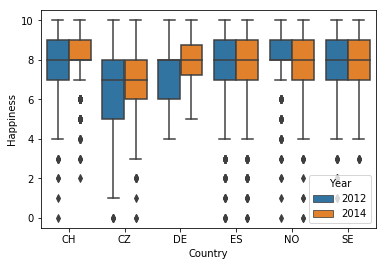

In [18]:
sns.boxplot(x='Country', y='Happiness', hue='Year', data=df)

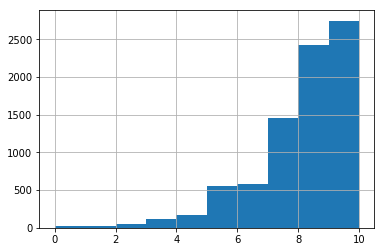

In [19]:
df['Happiness'].hist()

Both the box plots and histogram indicate that happiness level is not normal so a non-parametric test must be used.

#### Switzerland

In [20]:
df[df['Country'] == 'CH']['Year'].value_counts()

2014    743
2012    732
Name: Year, dtype: int64

In [21]:
# Prepare data
df1 = df[(df['Country']=='CH') & (df['Year']==2012)]
df2 = df[(df['Country']=='CH') & (df['Year']==2014)]

rank = stats.rankdata(df1['Happiness'].tolist() + df2['Happiness'].tolist())
rank1 = rank[:732]
rank2 = rank[732:]

stats.kruskal(rank1, rank2)

KruskalResult(statistic=0.7393607796289999, pvalue=0.3898657201494511)

There was not a significant difference in happiness level in Switzerland.

#### Czech Republic

In [22]:
df[df['Country'] == 'CZ']['Year'].value_counts()

2014    606
2012    601
Name: Year, dtype: int64

In [23]:
# Prepare data
df1 = df[(df['Country']=='CZ') & (df['Year']==2012)]
df2 = df[(df['Country']=='CZ') & (df['Year']==2014)]

rank = stats.rankdata(df1['Happiness'].tolist() + df2['Happiness'].tolist())
rank1 = rank[:601]
rank2 = rank[601:]

stats.kruskal(rank1, rank2)

KruskalResult(statistic=0.7888702806828175, pvalue=0.37444194652901)

There was not a significant difference in happiness level in the Czech Republic.

#### Denmark

In [24]:
df[df['Country'] == 'DE']['Year'].value_counts()

2014    14
2012    13
Name: Year, dtype: int64

In [25]:
# Prepare data
df1 = df[(df['Country']=='DE') & (df['Year']==2012)]
df2 = df[(df['Country']=='DE') & (df['Year']==2014)]

rank = stats.rankdata(df1['Happiness'].tolist() + df2['Happiness'].tolist())
rank1 = rank[:13]
rank2 = rank[13:]

stats.kruskal(rank1, rank2)

KruskalResult(statistic=0.7954545454545382, pvalue=0.3724558699813717)

There was not a significant difference in happiness level in Denmark.

#### Spain

In [26]:
df[df['Country'] == 'ES']['Year'].value_counts()

2012    1158
2014    1134
Name: Year, dtype: int64

In [27]:
# Prepare data
df1 = df[(df['Country']=='ES') & (df['Year']==2012)]
df2 = df[(df['Country']=='ES') & (df['Year']==2014)]

rank = stats.rankdata(df1['Happiness'].tolist() + df2['Happiness'].tolist())
rank1 = rank[:1134]
rank2 = rank[1134:]

stats.kruskal(rank1, rank2)

KruskalResult(statistic=3.043494071321485, pvalue=0.0810612651445277)

There was larger difference in happiness level in Spain between 2012 and 2014 but it was still not significant at the p-value = 0.05 level.

#### Norway

In [28]:
df[df['Country'] == 'NO']['Year'].value_counts()

2014    712
2012    708
Name: Year, dtype: int64

In [29]:
# Prepare data
df1 = df[(df['Country']=='NO') & (df['Year']==2012)]
df2 = df[(df['Country']=='NO') & (df['Year']==2014)]

rank = stats.rankdata(df1['Happiness'].tolist() + df2['Happiness'].tolist())
rank1 = rank[:708]
rank2 = rank[708:]

stats.kruskal(rank1, rank2)

KruskalResult(statistic=17.78863118177249, pvalue=2.4685385809958533e-05)

There was a significant difference in happiness level in Norway. This agrees with the large decrease in mean happiness of almost 0.35. This was the largest difference among countries.

#### Sweden

In [30]:
df[df['Country'] == 'SE']['Year'].value_counts()

2014    867
2012    859
Name: Year, dtype: int64

In [31]:
# Prepare data
df1 = df[(df['Country']=='SE') & (df['Year']==2012)]
df2 = df[(df['Country']=='SE') & (df['Year']==2014)]

rank = stats.rankdata(df1['Happiness'].tolist() + df2['Happiness'].tolist())
rank1 = rank[:859]
rank2 = rank[859:]

stats.kruskal(rank1, rank2)

KruskalResult(statistic=0.10011450993142058, pvalue=0.7516922609168144)

There was not a significant difference in happiness level in Sweden.

### 3. Who reported watching more TV in 2012, men or women?

In [32]:
df[df['Year']==2012].groupby(['Gender'])['TV_Hrs'].mean()

Gender
F    3.905352
M    3.859230
Name: TV_Hrs, dtype: float64

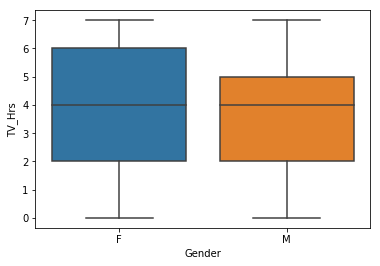

In [33]:
sns.boxplot(x='Gender', y='TV_Hrs', data=df[df['Year']==2012])

From the box plot, there does not seem to be a significant difference in TV hours between gender.

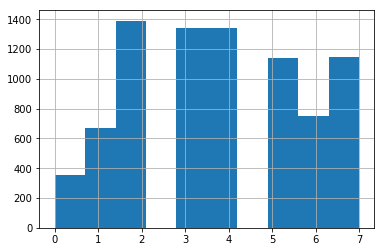

In [34]:
df['TV_Hrs'].hist()

There are two groups (i.e. male/female) and daily TV hours appears somewhat normal so a t-test may be used. The participants are not the same so this must be an independent t-test.

In [35]:
df1 = df[df['Year']==2012]
stats.ttest_ind(df1[df1['Gender']=='M']['TV_Hrs'].dropna(),
                      df1[df1['Gender']=='F']['TV_Hrs'].dropna())

Ttest_indResult(statistic=-0.7323552192640558, pvalue=0.4639939646110154)

The t-statistic and p-value support the conclusion that there is not a significant difference in TV hours reported between men and women in 2012.

### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [36]:
df[df['Year']==2012].groupby(['Partner'])['Fairness'].mean()

Partner
0    5.865925
1    6.074351
Name: Fairness, dtype: float64

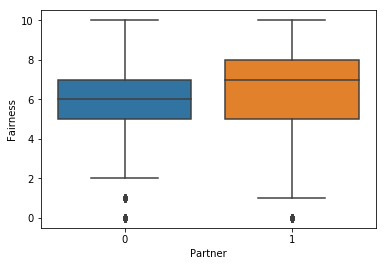

In [37]:
sns.boxplot(x='Partner', y='Fairness', data=df[df['Year']==2012])

From the box plot, there does not seem to be a significant difference in fairness level between those living alone vs. with a partner.

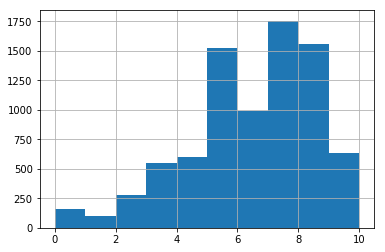

In [38]:
df['Fairness'].hist()

There are two groups (i.e. living alone vs. with a partner) and fairness level appears somewhat normal so a t-test may be used. The participants are not the same so this must be an independent t-test.

In [39]:
df1 = df[df['Year']==2012]
stats.ttest_ind(df1[df1['Partner']==0]['TV_Hrs'].dropna(),
                      df1[df1['Partner']==1]['TV_Hrs'].dropna())

Ttest_indResult(statistic=-1.7196826211114447, pvalue=0.08556619301534168)

The t-statistic and p-value support the conclusion that there is not a significant difference in fairness level reported between those living alone vs. with a partner in 2012.

### 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

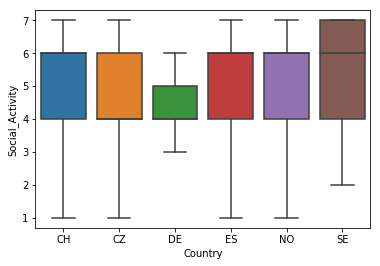

In [40]:
sns.boxplot(x='Country', y='Social_Activity', hue=None,
            data=df[df['Year']==2014])

From the box plots, it appears that Denmark and Sweden have different distributions than other countries. Use those and two others (Switzerland and Czech Republic) for a comparison.

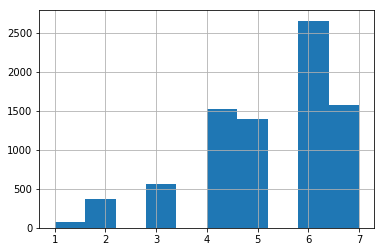

In [41]:
df['Social_Activity'].hist()

Social activity data do not appear to be normally distributed so a non-parametric test such as the Kruskal-Wallace test is needed.

In [42]:
df['Country'].value_counts()

ES    2292
SE    1726
CH    1475
NO    1420
CZ    1207
DE      27
Name: Country, dtype: int64

In [43]:
# Prepare data
df_CH = df[df['Country']=='CH']
df_CZ = df[df['Country']=='CZ']
df_DE = df[df['Country']=='DE']
df_SE = df[df['Country']=='SE']

rank = stats.rankdata(df_CH['Social_Activity'].tolist() +
                      df_CZ['Social_Activity'].tolist() +
                      df_DE['Social_Activity'].tolist() +
                      df_SE['Social_Activity'].tolist())
rank_CH = rank[:1475]
rank_CZ = rank[1475:2682]
rank_DE = rank[2682:2709]
rank_SE = rank[2709:]

In [44]:
# Kruskal-Wallace Test
stats.kruskal(rank_CH, rank_CZ, rank_DE, rank_SE)

KruskalResult(statistic=259.56470136590934, pvalue=5.584286977505873e-56)

Applying the Kruskal-Wallace Test on the four chosen countries suggests that there is a significant difference in social activity levels between them.

To determine which countries are different, check pairwise results:

In [45]:
stats.kruskal(rank_CH, rank_CZ)

KruskalResult(statistic=83.7195701730536, pvalue=5.70179871536554e-20)

In [46]:
stats.kruskal(rank_CH, rank_DE)

KruskalResult(statistic=6.345688769737615, pvalue=0.011766691308368485)

In [47]:
stats.kruskal(rank_CH, rank_SE)

KruskalResult(statistic=66.82627930435707, pvalue=2.96518817284126e-16)

In [48]:
stats.kruskal(rank_CZ, rank_DE)

KruskalResult(statistic=0.0018131411074285202, pvalue=0.96603554580067)

In [49]:
stats.kruskal(rank_CZ, rank_SE)

KruskalResult(statistic=232.36525878334288, pvalue=1.817733885544913e-52)

In [50]:
stats.kruskal(rank_DE, rank_SE)

KruskalResult(statistic=13.71543684562892, pvalue=0.00021269901380063623)

Looking at pairwise Kruskal-Wallace Test p-values, all combinations are significantly different except Czech Republic and Denmark. This indicates that box plots are misleading in this scenario. Denmark has a much smaller sample size than the others so this may be a factor.

### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

0.25    33.0
0.50    47.0
0.75    61.0
Name: Age, dtype: float64

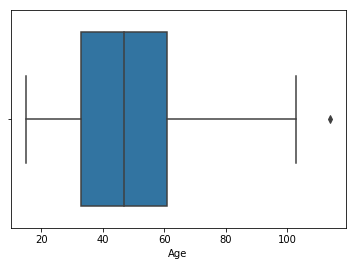

In [51]:
sns.boxplot(df['Age'])
df['Age'].quantile([0.25, 0.50, 0.75])

In [52]:
# Create quartile buckets
df['AgeQ'] = df['Age']
df.loc[df['Age'] <= 33,'AgeQ'] = 1
df.loc[(df['Age'] > 33) & (df['Age'] <= 47),'AgeQ'] = 2
df.loc[(df['Age'] > 47) & (df['Age'] <= 61),'AgeQ'] = 3
df.loc[df['AgeQ']> 61,'AgeQ'] = 4

First, bucket each participant by age quartile.

In [53]:
df[df['Year'] == 2014].groupby(['AgeQ','Country'])['Social_Activity'].mean()

AgeQ  Country
1     CH         5.586854
      CZ         5.109677
      ES         5.729825
      NO         5.848958
      SE         5.857759
2     CH         5.214286
      CZ         4.174157
      DE         4.000000
      ES         4.946128
      NO         5.150838
      SE         5.575000
3     CH         5.069364
      CZ         4.402367
      DE         4.666667
      ES         4.964912
      NO         5.110465
      SE         5.348718
4     CH         4.737143
      CZ         4.278846
      DE         4.333333
      ES         5.438202
      NO         5.071006
      SE         5.064286
Name: Social_Activity, dtype: float64

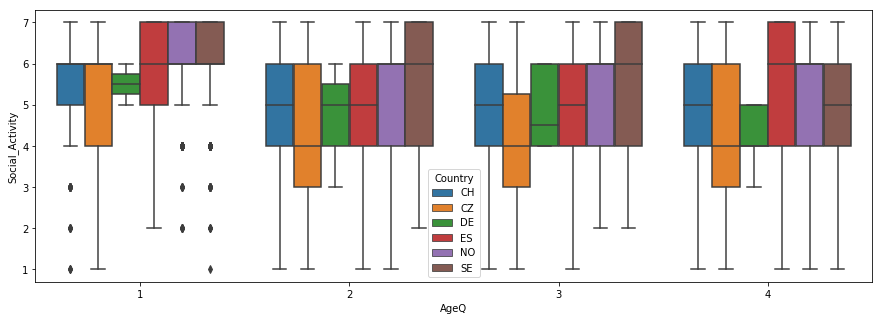

In [54]:
plt.figure(figsize=(15,5))
sns.boxplot(x='AgeQ', y='Social_Activity', hue='Country', data=df)

Looking at mean social activity in each age quartile, Sweden seems to be one of the most socially active countries with Czech Republic one of the least socially active. Switzerland and Spain are typically in the middle (although Spain is most socially active amongst the oldest quartile), so will be used for comparison.

In [55]:
df1 = df[(df['Year'] == 2014) & (df['AgeQ'] == 1)]
df2 = df[(df['Year'] == 2014) & (df['AgeQ'] == 2)]
df3 = df[(df['Year'] == 2014) & (df['AgeQ'] == 3)]
df4 = df[(df['Year'] == 2014) & (df['AgeQ'] == 4)]

#### First quartile

In [56]:
df1['Country'].value_counts()

ES    285
SE    232
CH    213
NO    192
CZ    155
Name: Country, dtype: int64

In [57]:
# Prepare data
df_CH = df1[df1['Country']=='CH']
df_CZ = df1[df1['Country']=='CZ']
df_ES = df1[df1['Country']=='ES']
df_SE = df1[df1['Country']=='SE']

rank = stats.rankdata(df_CH['Social_Activity'].tolist() +
                      df_CZ['Social_Activity'].tolist() +
                      df_ES['Social_Activity'].tolist() +
                      df_SE['Social_Activity'].tolist())
rank_CH = rank[:213]
rank_CZ = rank[213:368]
rank_ES = rank[368:653]
rank_SE = rank[653:]

stats.kruskal(rank_CH, rank_CZ, rank_ES, rank_SE)

KruskalResult(statistic=34.24126823533202, pvalue=1.7619249177632748e-07)

For the youngest age quartile, there is a significant difference in social activity.

To determine which countries are different, check pairwise results:

In [58]:
stats.kruskal(rank_CH, rank_CZ)

KruskalResult(statistic=11.264241639364457, pvalue=0.0007901445385577571)

In [59]:
stats.kruskal(rank_CH, rank_ES)

KruskalResult(statistic=1.1375095363222054, pvalue=0.2861791907113312)

In [60]:
stats.kruskal(rank_CH, rank_SE)

KruskalResult(statistic=9.229697580235197, pvalue=0.002381209739944135)

In [61]:
stats.kruskal(rank_CZ, rank_ES)

KruskalResult(statistic=19.33663318017098, pvalue=1.0958365446187156e-05)

In [62]:
stats.kruskal(rank_CZ, rank_SE)

KruskalResult(statistic=27.859658921630682, pvalue=1.3044125501340657e-07)

In [63]:
stats.kruskal(rank_ES, rank_SE)

KruskalResult(statistic=3.975177946330618, pvalue=0.046175574160336165)

With the exception of Switzerland and Spain, all country pairs showed a significant difference in social activity level within the first age quartile in 2014.

#### Second Quartile

In [64]:
df2['Country'].value_counts()

ES    297
CH    182
NO    179
CZ    178
SE    160
DE      2
Name: Country, dtype: int64

In [65]:
# Prepare data
df_CH = df2[df2['Country']=='CH']
df_CZ = df2[df2['Country']=='CZ']
df_ES = df2[df2['Country']=='ES']
df_SE = df2[df2['Country']=='SE']

rank = stats.rankdata(df_CH['Social_Activity'].tolist() +
                      df_CZ['Social_Activity'].tolist() +
                      df_ES['Social_Activity'].tolist() +
                      df_SE['Social_Activity'].tolist())
rank_CH = rank[:182]
rank_CZ = rank[182:360]
rank_ES = rank[360:657]
rank_SE = rank[657:]

stats.kruskal(rank_CH, rank_CZ, rank_ES, rank_SE)

KruskalResult(statistic=95.37762619671099, pvalue=1.5316474788067788e-20)

For the second age quartile, there is a significant difference in social activity.

To determine which countries are different, check pairwise results:

In [66]:
stats.kruskal(rank_CH, rank_CZ)

KruskalResult(statistic=53.179815631318384, pvalue=3.0437030408166454e-13)

In [67]:
stats.kruskal(rank_CH, rank_ES)

KruskalResult(statistic=2.8008236834100133, pvalue=0.09421589431630185)

In [68]:
stats.kruskal(rank_CH, rank_SE)

KruskalResult(statistic=13.469392163601688, pvalue=0.00024248685326510664)

In [69]:
stats.kruskal(rank_CZ, rank_ES)

KruskalResult(statistic=36.60352577838976, pvalue=1.447696328801244e-09)

In [70]:
stats.kruskal(rank_CZ, rank_SE)

KruskalResult(statistic=71.6914187241201, pvalue=2.516244659626805e-17)

In [71]:
stats.kruskal(rank_ES, rank_SE)

KruskalResult(statistic=25.406599361200392, pvalue=4.643269692888364e-07)

Like in the first age quartile, with the exception of Switzerland and Spain, all country pairs showed a significant difference in social activity level within the second age quartile in 2014.

#### Third Quartile

In [72]:
df3['Country'].value_counts()

ES    285
SE    195
CH    173
NO    172
CZ    169
DE      6
Name: Country, dtype: int64

In [73]:
# Prepare data
df_CH = df3[df3['Country']=='CH']
df_CZ = df3[df3['Country']=='CZ']
df_ES = df3[df3['Country']=='ES']
df_SE = df3[df3['Country']=='SE']

rank = stats.rankdata(df_CH['Social_Activity'].tolist() +
                      df_CZ['Social_Activity'].tolist() +
                      df_ES['Social_Activity'].tolist() +
                      df_SE['Social_Activity'].tolist())
rank_CH = rank[:173]
rank_CZ = rank[173:342]
rank_ES = rank[342:653]
rank_SE = rank[653:]

stats.kruskal(rank_CH, rank_CZ, rank_ES, rank_SE)

KruskalResult(statistic=39.00207340615644, pvalue=1.7339106433906416e-08)

For the third age quartile, there is a significant difference in social activity.

To determine which countries are different, check pairwise results:

In [74]:
stats.kruskal(rank_CH, rank_CZ)

KruskalResult(statistic=17.492392672596612, pvalue=2.8845959789277558e-05)

In [75]:
stats.kruskal(rank_CH, rank_ES)

KruskalResult(statistic=0.01877227207772862, pvalue=0.8910213562809013)

In [76]:
stats.kruskal(rank_CH, rank_SE)

KruskalResult(statistic=5.402886355933767, pvalue=0.020103478193500116)

In [77]:
stats.kruskal(rank_CZ, rank_ES)

KruskalResult(statistic=19.508321407179395, pvalue=1.0016239322553478e-05)

In [78]:
stats.kruskal(rank_CZ, rank_SE)

KruskalResult(statistic=33.651766762426085, pvalue=6.591498310221881e-09)

In [79]:
stats.kruskal(rank_ES, rank_SE)

KruskalResult(statistic=7.272320692265679, pvalue=0.007002526902613425)

As with the previous age quartiles, with the exception of Switzerland and Spain, all country pairs showed a significant difference in social activity level within the third age quartile in 2014.

#### Fourth quartile

In [80]:
df4['Country'].value_counts()

SE    280
ES    267
CH    175
NO    169
CZ    104
DE      6
Name: Country, dtype: int64

In [81]:
# Prepare data
df_CH = df4[df4['Country']=='CH']
df_CZ = df4[df4['Country']=='CZ']
df_ES = df4[df4['Country']=='ES']
df_SE = df4[df4['Country']=='SE']

rank = stats.rankdata(df_CH['Social_Activity'].tolist() +
                      df_CZ['Social_Activity'].tolist() +
                      df_ES['Social_Activity'].tolist() +
                      df_SE['Social_Activity'].tolist())
rank_CH = rank[:175]
rank_CZ = rank[175:279]
rank_ES = rank[279:546]
rank_SE = rank[546:]

stats.kruskal(rank_CH, rank_CZ, rank_ES, rank_SE)

KruskalResult(statistic=64.12079765058424, pvalue=7.734041915186611e-14)

For the oldest age quartile, there is a significant difference in social activity.

To determine which countries are different, check pairwise results:

In [82]:
stats.kruskal(rank_CH, rank_CZ)

KruskalResult(statistic=6.18304377805685, pvalue=0.012898021446664958)

In [83]:
stats.kruskal(rank_CH, rank_ES)

KruskalResult(statistic=29.703206884733092, pvalue=5.0351456124708395e-08)

In [84]:
stats.kruskal(rank_CH, rank_SE)

KruskalResult(statistic=5.250117034296918, pvalue=0.021945294938450807)

In [85]:
stats.kruskal(rank_CZ, rank_ES)

KruskalResult(statistic=47.40899921050013, pvalue=5.761756224929105e-12)

In [86]:
stats.kruskal(rank_CZ, rank_SE)

KruskalResult(statistic=22.261500923347416, pvalue=2.3792940554695527e-06)

In [87]:
stats.kruskal(rank_ES, rank_SE)

KruskalResult(statistic=17.732058912727606, pvalue=2.5430451020832663e-05)

All country pairs, including Switzerland and Spain, showed a significant difference in social activity level within the oldest age quartile in 2014.

#### Conclusion

Social activity level varied within age quartiles amongst different countries in 2014. Among those that stood out were Czech Republic and Sweden while Switzerland and Spain were mostly similar (with the exception of the oldest quartile where Spain was also significantly different).